<a href="https://colab.research.google.com/github/COHMAM/Homework-on-the-topic-Time-Series-General-Theory-/blob/main/%D0%94%D0%97_%22%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Скачивание материалов к занятию

In [ ]:
import pandas as pd

import numpy as np

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

#Анализ рядов и перевод "их в стационарное состояние"

###Визуальный анализ графиков

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

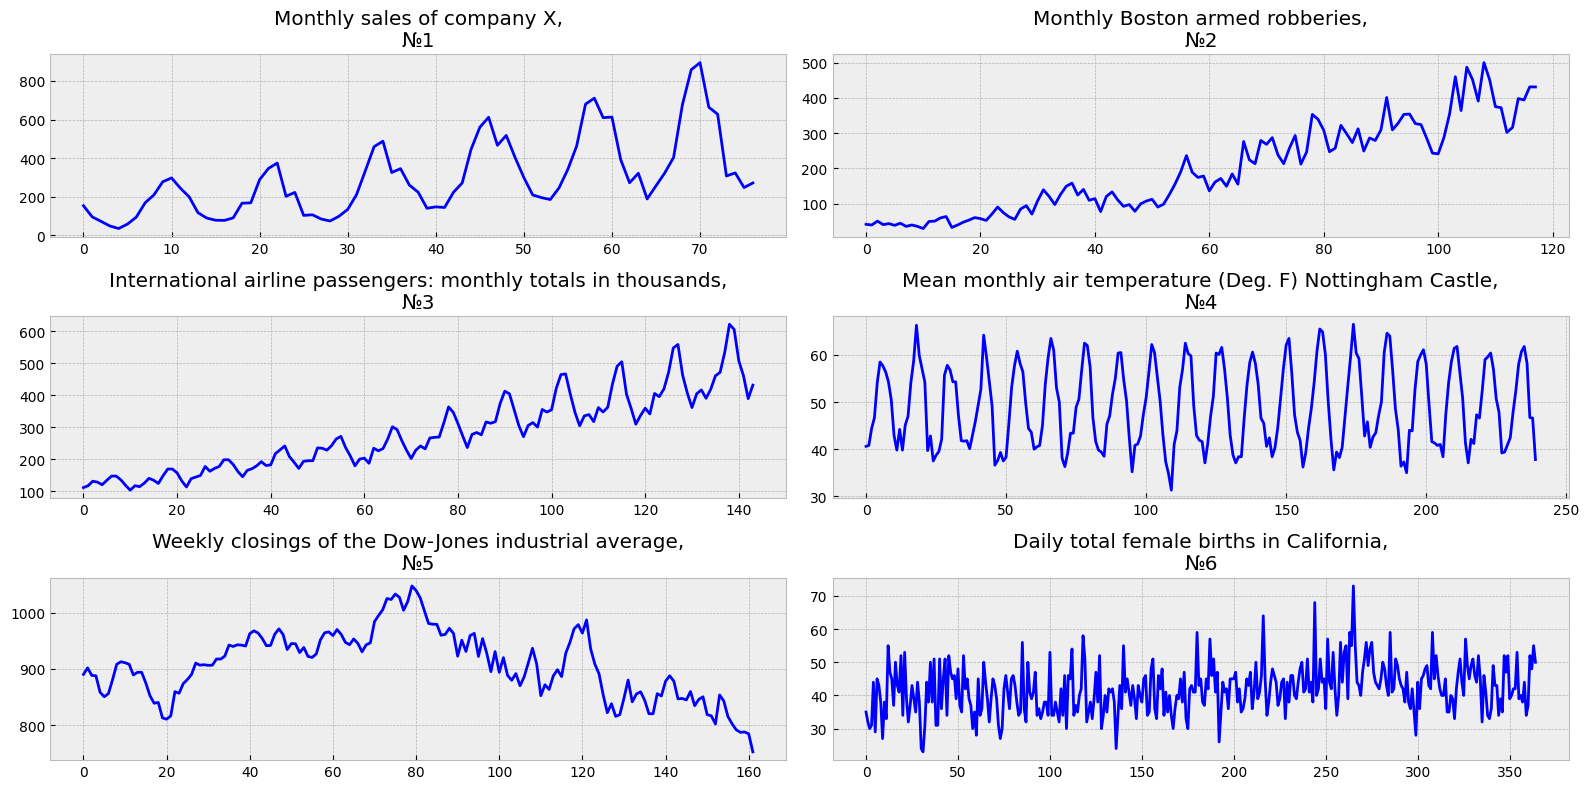

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(f'{key},\n№{i+1}')

    plt.tight_layout()

Все графики визуально не подходят под описание стационарного ряда, т.к на разных промежутках, разные дисперсии, что не отвечает критерию определения стационарности ряда "визуально". Больше всех похоже графики под номерами 4, 6 их и возьмём для работы, а так же графики под номерами 5 и 2.


####Проверка тестом Дики-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    #print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return f'Results of Dickey-Filler Test:\n{dfoutput}'
    #print(dfoutput)

In [ ]:
spisok = []
for i,x in enumerate(all_series):
   if i+1 in [4,6,5,3] :
    spisok.append(x)
   # print(x, '\n', i+1)

In [ ]:
series={}
for x in spisok:
  series[x] = all_series[x]

In [ ]:
for x in series:
  print('',x,'\n',test_stationarity(series[x]),'\n')

 International airline passengers: monthly totals in thousands 
 Results of Dickey-Filler Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 

 Mean monthly air temperature (Deg. F) Nottingham Castle 
 Results of Dickey-Filler Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64 

 Weekly closings of the Dow-Jones industrial average 
 Results of Dickey-Filler Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used            

####Daily total female births in California

In [ ]:
from scipy.stats import boxcox

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
exampl = boxcox(series['Daily total female births in California'],0)

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

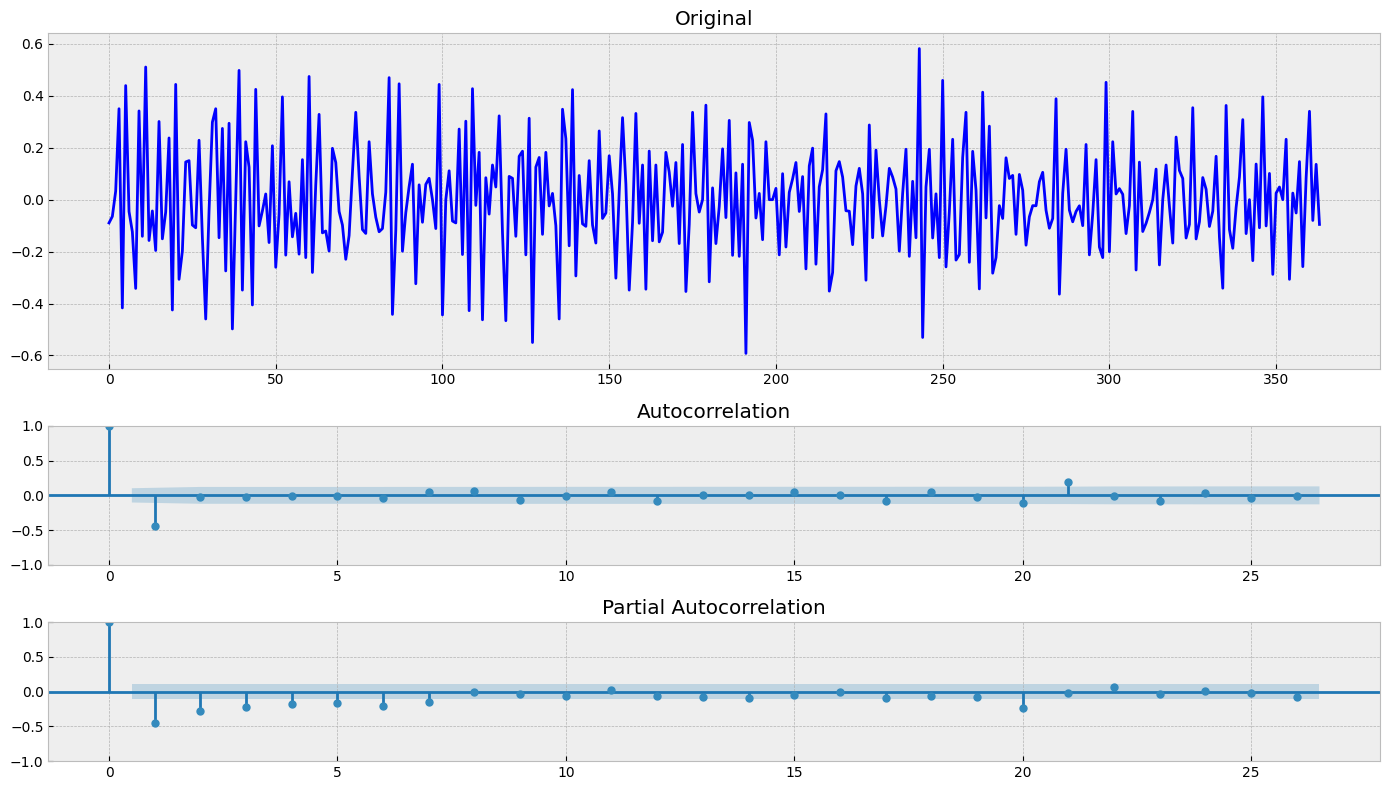

In [ ]:
tsplot(np.diff(exampl,1))

При помощи теста выявили, что ряд под номером 6 удовлетворяет гипотезе о стационарности теста "Дики-Фуллера".

####International airlaine passengers: montly totals in thousands

In [ ]:
example_1 = series['International airline passengers: monthly totals in thousands']

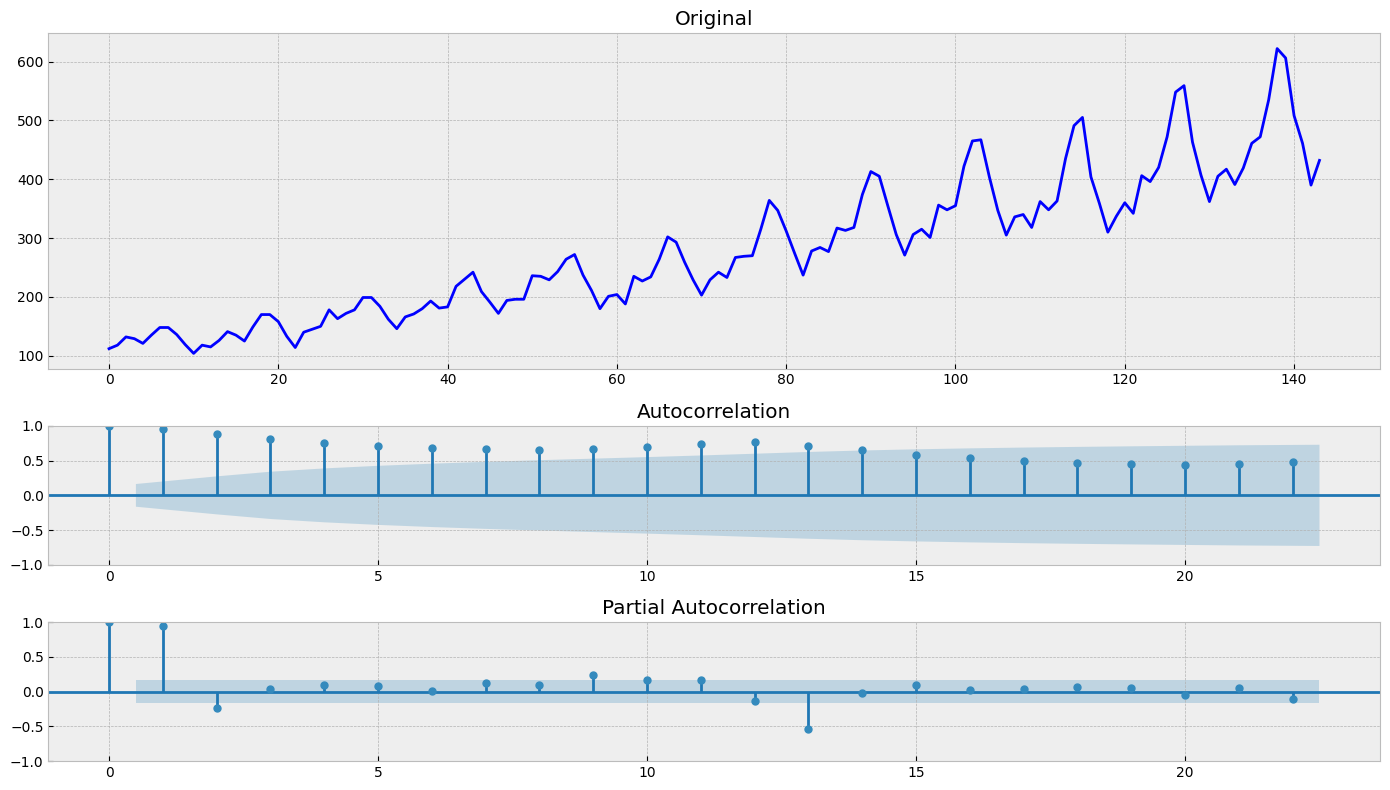

In [ ]:
tsplot(example_1)

В данном ряде проглядывается тренд и изменчивость дисперсии. Тренд можно убрать дифференциированием 1 степени, изменчивость дисперсии преобразованием бокса кокса.

In [ ]:
example_1_box = boxcox(example_1,0)

example_1_box_trend = np.diff(example_1_box,1)

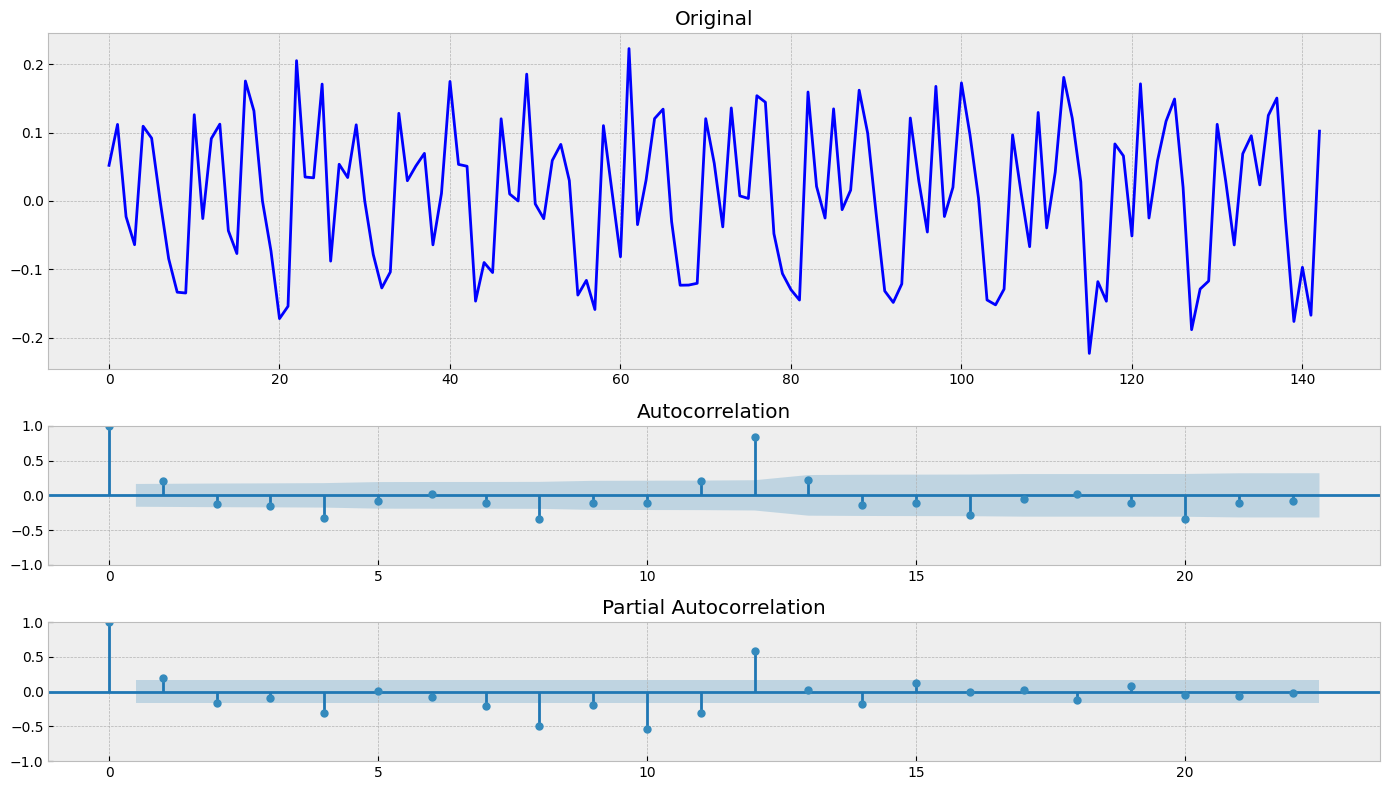

In [ ]:
tsplot(example_1_box_trend)

In [ ]:
print(test_stationarity(example_1_box_trend))

Results of Dickey-Filler Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


Всё ещё что-то остаётся в ряде, т.к график автокорреляции имеет коррелирующие значения, так же не пройдён тест "Дикки-фуллера"

Results of Dickey-Filler Test:
Test Statistic                -1.609085e+01
p-value                        5.255378e-29
#Lags Used                     1.300000e+01
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64


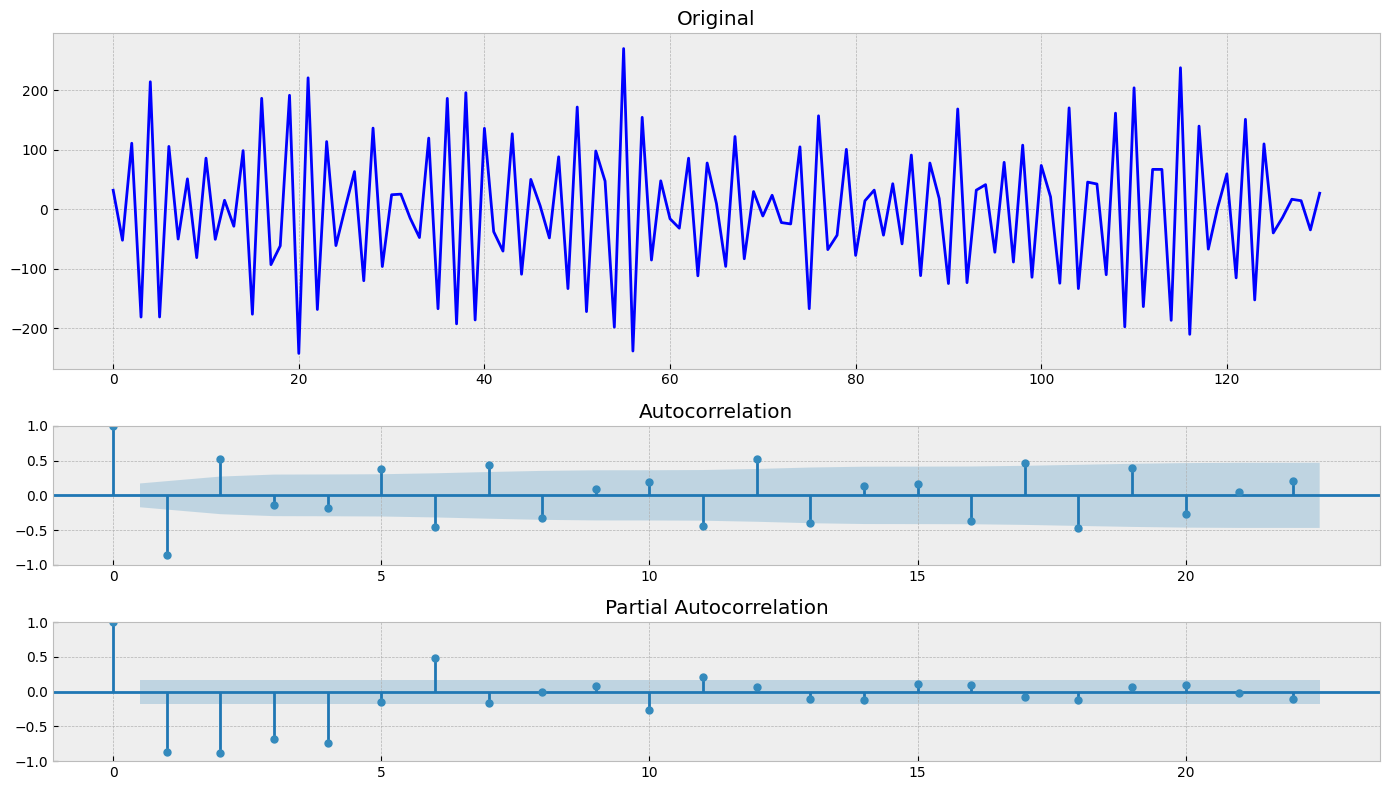

In [ ]:
example_1_box_trend_sezon = np.diff(example_1_box_trend,12)

tsplot(example_1_box_trend_sezon)

print(test_stationarity(example_1_box_trend_sezon))

Продифференциировав ряд добились улучшения значения для теста "Дикки-Фуллера", так же остался не понятным график автокорреляции, т.к некоторые значения выходят за границы.

####Mean monthly air temperature (Deg. F) Nottingham Castle

In [ ]:
example_2 = series['Mean monthly air temperature (Deg. F) Nottingham Castle']

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

In [ ]:
from statsmodels.tsa.api import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

aic: 1137.39160 | order: (3, 1, 3)
Results of Dickey-Fuller Test:
Test Statistic                -5.687452e+00
p-value                        8.216742e-07
#Lags Used                     5.000000e+00
Number of Observations Used    2.320000e+02
Critical Value (1%)           -3.458855e+00
Critical Value (5%)           -2.874080e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


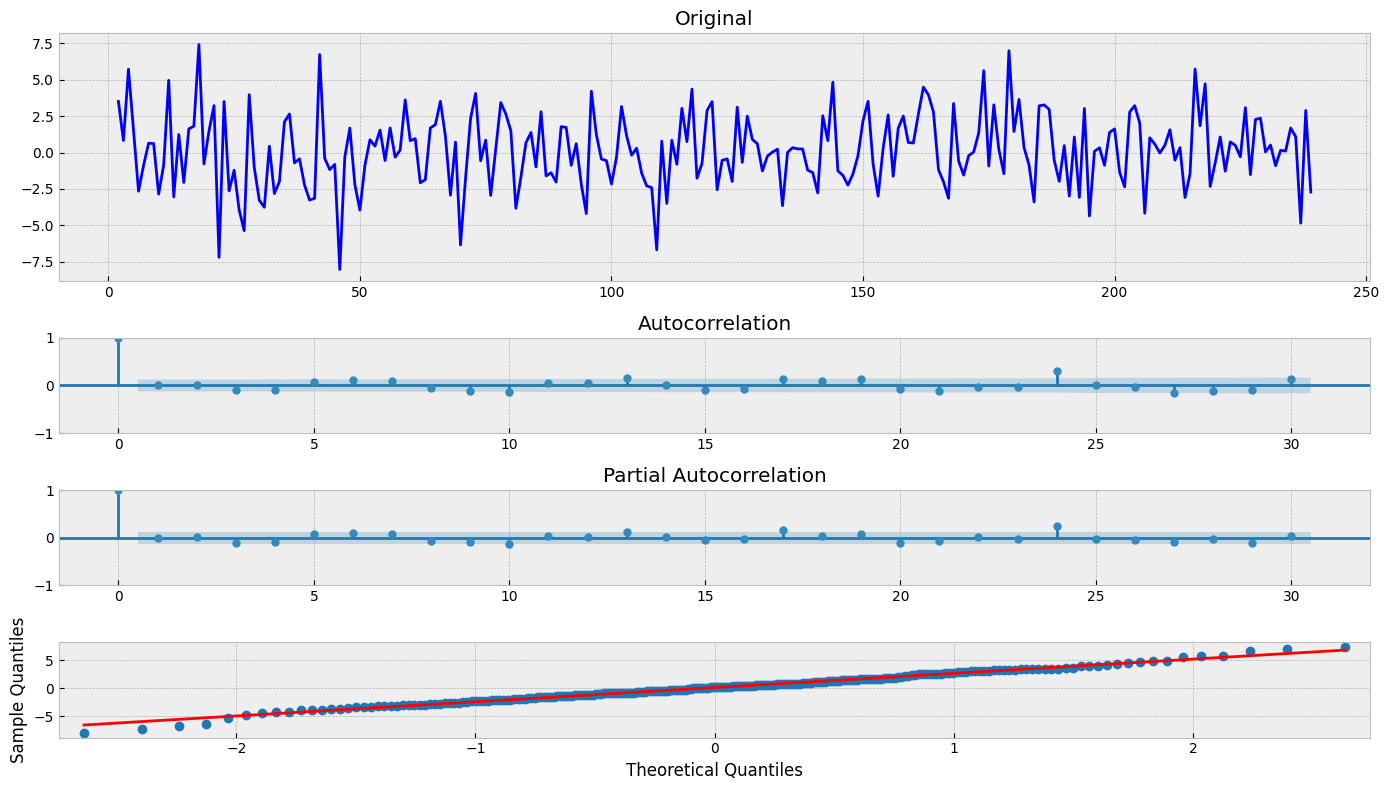

In [ ]:
#series = pd.read_csv("../1. Лекция/Series/international-airline-passengers.csv")['Count']

best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(example_2, order=(i,d,j),trend=[0]).fit(method='statespace')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid[2:], lags=30)

Привели ряд к стационарному виду, использую модель ARIMA

####Weekly closings of the Dow-Jones industrial average

In [ ]:
example_3 = series['Weekly closings of the Dow-Jones industrial average']

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


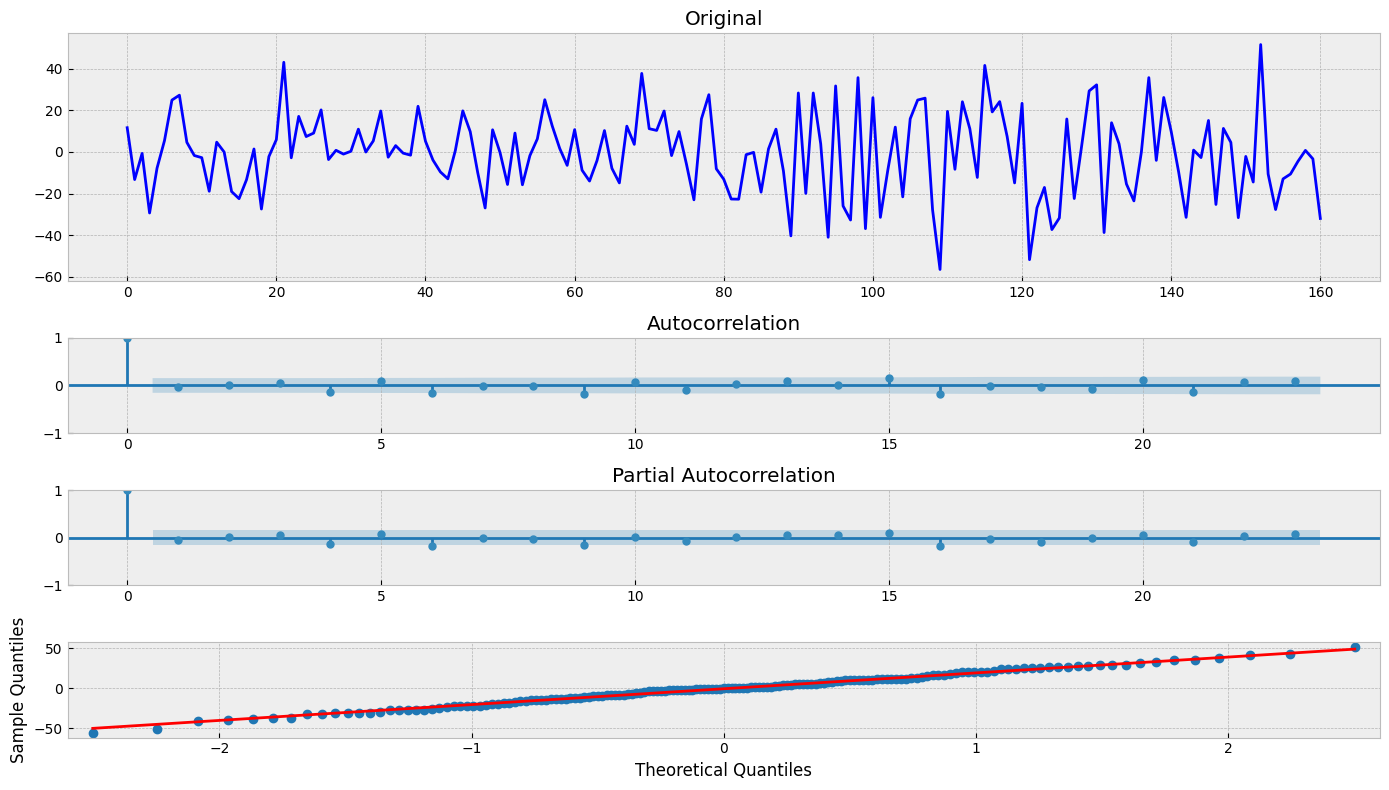

In [ ]:
example_3_trend = np.diff(example_3,1)

tsplot(example_3_trend)